## Importerer pakker

In [35]:
# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Preprocessing


# Model Selection and Evaluation
from sklearn.model_selection import train_test_split


## Leser inn renset fil

In [36]:
df_train = pd.read_csv('train_df.csv')
pd.set_option('display.max_columns', None)
pd.reset_option('display.float_format')

## Beskrivelse av data

In [37]:
df_train.describe()

oppholdslengde        alder    utdanning      inntekt    blodtrykk  \
count     3988.000000  3986.000000  3418.000000  2444.000000  3975.000000   
mean        18.106319    62.447817    11.693681    16.806056    86.095849   
std         22.769578    15.386608     3.456333    10.457995    25.918111   
min          3.000000    18.000000     0.000000     8.000000    10.000000   
25%          7.000000    53.000000    10.000000     8.000000    66.000000   
50%         11.000000    65.000000    12.000000     8.000000    79.000000   
75%         20.000000    73.000000    14.000000    20.000000   107.000000   
max        343.000000   102.000000    31.000000    35.000000   174.000000   

       hvite_blodlegemer  hjertefrekvens  respirasjonsfrekvens  \
count        3988.000000     3968.000000           3968.000000   
mean           11.767121       96.312576             23.296623   
std             8.608951       29.283029              8.856015   
min             0.000000        5.000000              2.000000   
25%             6.899414       72.000000             20.000000   
50%            10.000000       98.000000             24.000000   
75%            14.423828      117.000000             28.000000   
max           128.781250      232.000000             72.000000   

       kroppstemperatur  lungefunksjon  serumalbumin    kreatinin  \
count       3988.000000    3988.000000   3988.000000  3988.000000   
mean          37.067017     271.423826      3.207214     1.693591   
std            1.201276     100.684612      0.804716     1.682618   
min           31.699220      31.000000      0.399963     0.199982   
25%           36.195310     191.953125      2.699707     0.899902   
50%           36.695310     294.250000      3.500000     1.199951   
75%           38.093750     333.300000      3.500000     1.699951   
max           41.296880     869.375000     29.000000    21.500000   

           natrium      blod_ph      glukose  blodurea_nitrogen   urinmengde  \
count  3988.000000  2869.000000  2027.000000        3988.000000  3988.000000   
mean    137.374875     7.417360   159.457030          20.014609  2393.779227   
std       5.747914     0.078189    85.491935          23.261215   991.862373   
min     111.000000     6.829102     1.399902           2.000000     3.519531   
25%     134.000000     7.379883   103.500000           6.510000  2137.500000   
50%     137.000000     7.429688   135.000000           7.000000  2502.000000   
75%     141.000000     7.469727   189.500000          25.000000  2502.000000   
max     168.000000     7.709961  1092.000000         192.000000  9000.000000   

       antall_komorbiditeter   koma_score  adl_stedfortreder  \
count            3988.000000  3988.000000        2786.000000   
mean                1.920762     6.674524           1.497487   
std                 1.353771    16.851790           2.141534   
min                 0.000000     0.000000           0.000000   
25%                 1.000000     0.000000           0.000000   
50%                 2.000000     0.000000           0.000000   
75%                 3.000000     0.000000           2.000000   
max                 9.000000   100.000000           7.000000   

       fysiologisk_score  apache_fysiologisk_score  overlevelsesestimat_2mnd  \
count        3988.000000               3988.000000               3988.000000   
mean           22.733695                 31.978435                  0.717976   
std             7.319929                 15.787784                  0.180972   
min             0.199982                  0.000000                  0.000000   
25%            17.699219                 20.000000                  0.638672   
50%            22.097656                 31.000000                  0.770996   
75%            27.000000                 41.000000                  0.848999   
max            75.500000                107.000000                  0.969971   

       overlevelsesestimat_6mnd     diabetes       demens  \
count           

## Korrelasjonsmatrise for numeriske variabler

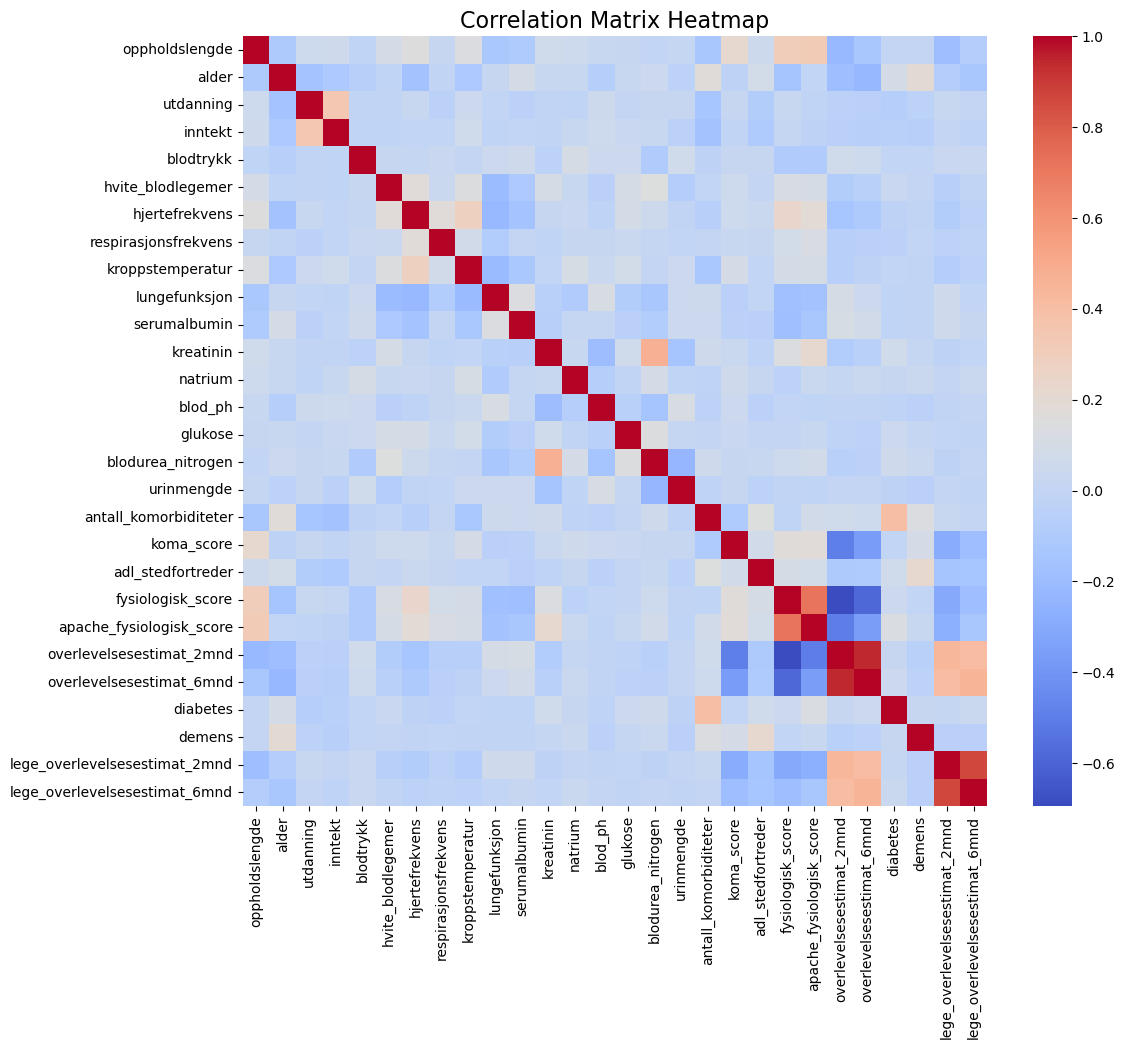

In [38]:
# Select only the numeric columns from the dataset
numeric_df = df_train.select_dtypes(include=[np.number])

# Compute the correlation matrix using only the numeric columns
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(corr_matrix, cmap="coolwarm")  # Remove the annot parameter to hide values in cells
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

## Korrelasjonsmatrise avhengig av oppholdslengde

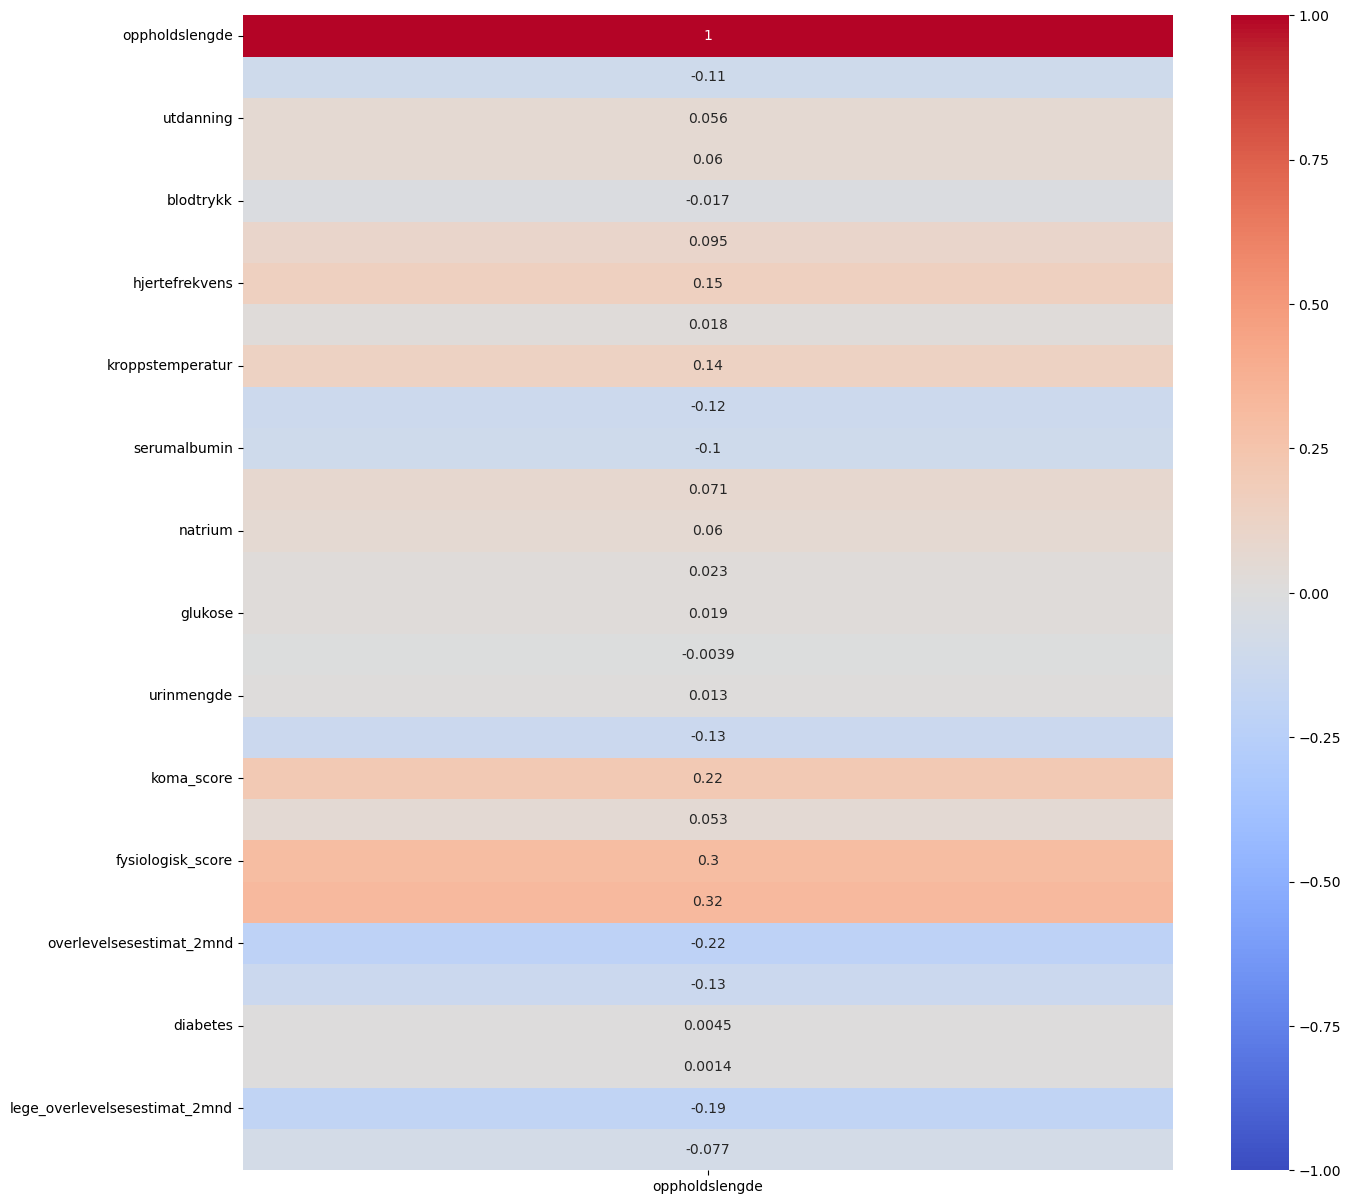

In [39]:
# Select only the numeric columns from the dataset
numeric_df = df_train.select_dtypes(include=[np.number])

# Compute the correlation matrix using only the numeric columns
corr_matrix = numeric_df.corr()
oppholdslengde_corr = corr_matrix[['oppholdslengde']]
sns.heatmap(oppholdslengde_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1, cbar=True)
plt.gcf().set_size_inches(15, 15)

## Korrelasjonsmatrise avhengig av oppholdslengde delt opp med en terskel på 0.05

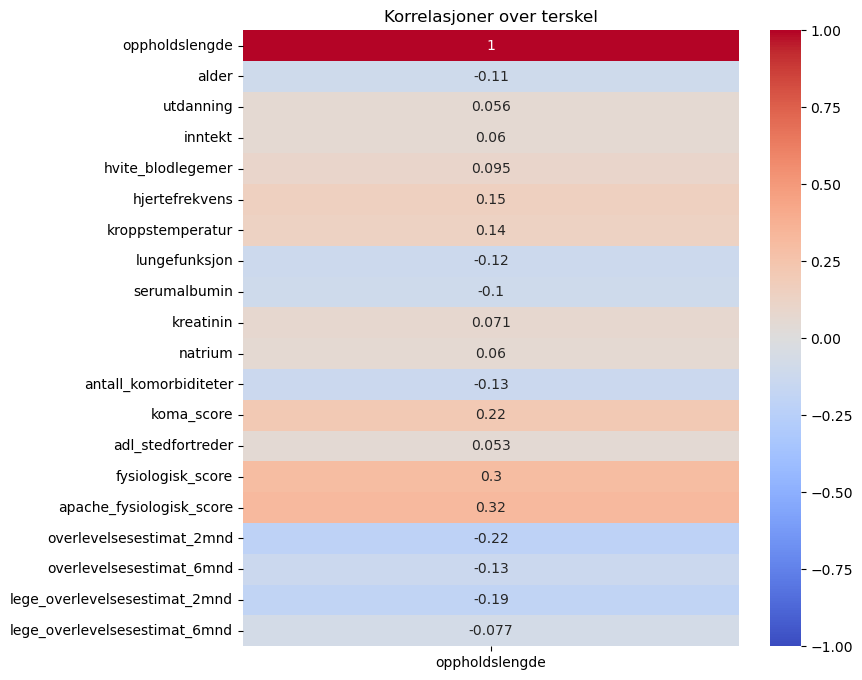

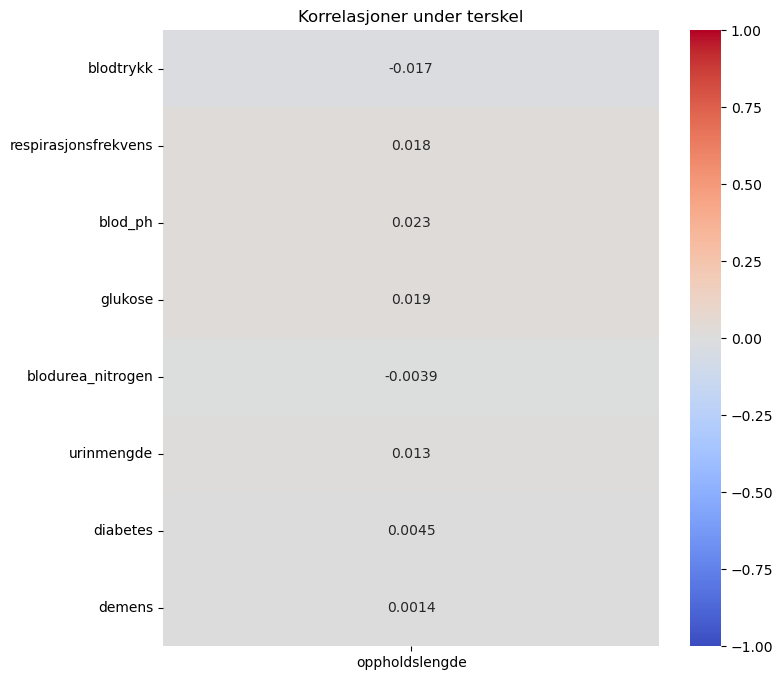

In [40]:
# Beregn korrelasjonsmatrisen
# Select only the numeric columns from the dataset
numeric_df = df_train.select_dtypes(include=[np.number])

# Compute the correlation matrix using only the numeric columns
corr_matrix = numeric_df.corr()

# Velg korrelasjoner med oppholdslengde
oppholdslengde_corr = corr_matrix[['oppholdslengde']]

# Definer terskel
threshold = 0.05

# Del korrelasjonsmatrisen i to
high_corr = oppholdslengde_corr[(oppholdslengde_corr['oppholdslengde'].abs() >= threshold)]
low_corr = oppholdslengde_corr[(oppholdslengde_corr['oppholdslengde'].abs() < threshold)]

# Plot heatmaps for hver del
plt.figure(figsize=(8, 8))
sns.heatmap(high_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1, cbar=True)
plt.title("Korrelasjoner over terskel")
plt.show()

plt.figure(figsize=(8, 8))
sns.heatmap(low_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1, cbar=True)
plt.title("Korrelasjoner under terskel")
plt.show()

# Visualisering

## Visualisering av sykehusdata

In [41]:

fig = px.histogram(df_train, x='oppholdslengde')
fig.show()

Vi ser på oppholdslengde, at normal oppholdslengde befinner seg mellom 0-50. Likevel har vi en del outliers i intervallet 50-343

## Ser på dataen til outliers sammenlignet med alle pasienter

In [42]:
long_stay_patients = df_train[df_train['oppholdslengde'] > 100]
long_stay_patients.describe(include='all')

oppholdslengde      alder kjønn  utdanning   inntekt etnisitet  \
count        62.000000  62.000000    62  54.000000  32.00000        62   
unique             NaN        NaN     2        NaN       NaN         4   
top                NaN        NaN  male        NaN       NaN     white   
freq               NaN        NaN    34        NaN       NaN        53   
mean        143.129032  58.064516   NaN  11.888889  19.34375       NaN   
std          50.491513  15.000405   NaN   3.418411  11.19219       NaN   
min         101.000000  22.000000   NaN   2.000000   8.00000       NaN   
25%         109.250000  49.000000   NaN  10.000000   8.00000       NaN   
50%         117.500000  58.500000   NaN  12.000000  20.00000       NaN   
75%         157.500000  67.750000   NaN  14.000000  35.00000       NaN   
max         343.000000  87.000000   NaN  19.000000  35.00000       NaN   

         blodtrykk  hvite_blodlegemer  hjertefrekvens  respirasjonsfrekvens  \
count    61.000000          62.000000       61.000000             62.000000   
unique         NaN                NaN             NaN                   NaN   
top            NaN                NaN             NaN                   NaN   
freq           NaN                NaN             NaN                   NaN   
mean     86.163934          13.845750      111.442623             23.709677   
std      32.304891           6.372244       28.458464             10.477747   
min      33.000000           0.500000       63.000000              6.000000   
25%      62.000000           8.674316       90.000000             12.500000   
50%      75.000000          13.348633      115.000000             24.000000   
75%     116.000000          18.149414      126.000000             31.750000   
max     147.000000          31.796875      189.000000             48.000000   

        kroppstemperatur  lungefunksjon  serumalbumin  kreatinin     natrium  \
count          62.000000      62.000000     62.000000  62.000000   62.000000   
unique               NaN            NaN           NaN        NaN         NaN   
top                  NaN            NaN           NaN        NaN         NaN   
freq                 NaN            NaN           NaN        NaN         NaN   
mean           37.472531     237.416557      2.956326   2.227245  139.193548   
std             1.316932      92.282971      0.786678   2.654360    6.169302   
min            33.296880      60.000000      0.500000   0.399963  128.000000   
25%            36.398440     160.625000      2.424927   0.824921  134.250000   
50%            37.746095     234.031250      3.299805   1.249878  139.000000   
75%            38.500000     314.250000      3.500000   1.874878  143.750000   
max            40.195310     452.375000      4.199219  12.898438  153.000000   

          blod_ph     glukose  blodurea_nitrogen   urinmengde sykdomskategori  \
count   55.000000   28.000000          62.000000    62.000000              62   
unique        NaN         NaN                NaN          NaN               3   
top           NaN         NaN                NaN          NaN        ARF/MOSF   
freq          NaN         NaN                NaN          NaN              52   
mean     7.415341  164.500000          15.029516  2407.629032             NaN   
std      0.076356   90.438643          15.066296   996.046237             NaN   
min      7.209961   70.000000           3.000000   450.000000             NaN   
25%      7.369141   94.500000           6.510000  2457.500000             NaN   
50%      7.399414  135.000000           6.510000  2502.000000             NaN   
75%      7.459961  183.250000          19.250000  2502.000000             NaN   
max      7.659180  395.000000          82.000000  9000.000000             NaN   

       sykdom_underkategori  antall_komorbiditeter  koma_score  \
count                    62              62.000000   62.000000   
unique                    5                    NaN         NaN   
top       ARF/MOSF w/Sepsis           

In [43]:
normal_stay_pasient = df_train[df_train['oppholdslengde']<=100]
df_train.describe(include='all')

oppholdslengde        alder kjønn    utdanning      inntekt etnisitet  \
count      3988.000000  3986.000000  3988  3418.000000  2444.000000      3978   
unique             NaN          NaN     2          NaN          NaN         5   
top                NaN          NaN  male          NaN          NaN     white   
freq               NaN          NaN  2248          NaN          NaN      3173   
mean         18.106319    62.447817   NaN    11.693681    16.806056       NaN   
std          22.769578    15.386608   NaN     3.456333    10.457995       NaN   
min           3.000000    18.000000   NaN     0.000000     8.000000       NaN   
25%           7.000000    53.000000   NaN    10.000000     8.000000       NaN   
50%          11.000000    65.000000   NaN    12.000000     8.000000       NaN   
75%          20.000000    73.000000   NaN    14.000000    20.000000       NaN   
max         343.000000   102.000000   NaN    31.000000    35.000000       NaN   

          blodtrykk  hvite_blodlegemer  hjertefrekvens  respirasjonsfrekvens  \
count   3975.000000        3988.000000     3968.000000           3968.000000   
unique          NaN                NaN             NaN                   NaN   
top             NaN                NaN             NaN                   NaN   
freq            NaN                NaN             NaN                   NaN   
mean      86.095849          11.767121       96.312576             23.296623   
std       25.918111           8.608951       29.283029              8.856015   
min       10.000000           0.000000        5.000000              2.000000   
25%       66.000000           6.899414       72.000000             20.000000   
50%       79.000000          10.000000       98.000000             24.000000   
75%      107.000000          14.423828      117.000000             28.000000   
max      174.000000         128.781250      232.000000             72.000000   

        kroppstemperatur  lungefunksjon  serumalbumin    kreatinin  \
count        3988.000000    3988.000000   3988.000000  3988.000000   
unique               NaN            NaN           NaN          NaN   
top                  NaN            NaN           NaN          NaN   
freq                 NaN            NaN           NaN          NaN   
mean           37.067017     271.423826      3.207214     1.693591   
std             1.201276     100.684612      0.804716     1.682618   
min            31.699220      31.000000      0.399963     0.199982   
25%            36.195310     191.953125      2.699707     0.899902   
50%            36.695310     294.250000      3.500000     1.199951   
75%            38.093750     333.300000      3.500000     1.699951   
max            41.296880     869.375000     29.000000    21.500000   

            natrium      blod_ph      glukose  blodurea_nitrogen   urinmengde  \
count   3988.000000  2869.000000  2027.000000        3988.000000  3988.000000   
unique          NaN          NaN          NaN                NaN          NaN   
top             NaN          NaN          NaN                NaN          NaN   
freq            NaN          NaN          NaN                NaN          NaN   
mean     137.374875     7.417360   159.457030          20.014609  2393.779227   
std        5.747914     0.078189    85.491935          23.261215   991.862373   
min      111.000000     6.829102     1.399902           2.000000     3.519531   
25%      134.000000     7.379883   103.500000           6.510000  2137.500000   
50%      137.000000     7.429688   135.000000           7.000000  2502.000000   
75%      141.000000     7.469727   189.500000          25.000000  2502.000000   
max      168.000000     7.709961  1092.000000         192.000000  9000.000000   

       sykdomskategori sykdom_underkategori  antall_komorbiditeter  \
count             3988                 3988            3988.000000   
unique               4                    8                    NaN   
top           ARF/MOSF    ARF/MOSF w/Sepsis       

313 av 5413 pasienter har en oppholdslengde større enn 50 dager. Det som kjennetegner disse pasientene, er at de i gjennomsnitt har noe høyere fysiologiske verdier enn normalen. Likevel er denne endringen minimal, og det er ikke noe tydelig kjennetegn for pasienter som har lengre oppholdslengde.

## Visualisering av fysiologiske data

In [46]:
# List of physiological data to plot against hospital stay length
fysiologiske_data = ['blodtrykk', 'hvite_blodlegemer', 'hjertefrekvens', 'respirasjonsfrekvens', 'kroppstemperatur', 'lungefunksjon', 'serumalbumin']

# Create a new column that represents if the hospital stay is longer than 150 days
df_train['long_stay'] = df_train['oppholdslengde'] > 150

# Loop through each physiological feature to create scatter plots
for value in fysiologiske_data:
    # Create the scatter plot with color distinction based on the long_stay condition
    fig = px.scatter(
        df_train, 
        x=value, 
        y="oppholdslengde", 
        color='long_stay', 
        labels={'long_stay': 'Long Hospital Stay (>150 days)', 'oppholdslengde': 'Hospital Stay Length'},
        title=f'Scatter Plot of {value} vs. Hospital Stay Length'
    )
    
    # Show the plot
    fig.show()

In [48]:
fysiologiske_data = {'kreatinin', 'natrium', 'blod_ph', 'glukose', 'blodurea_nitrogen', 'urinmengde'}
# Create a new column that represents if the hospital stay is longer than 150 days
df_train['long_stay'] = df_train['oppholdslengde'] > 150

# Loop through each physiological feature to create scatter plots
for value in fysiologiske_data:
    # Create the scatter plot with color distinction based on the long_stay condition
    fig = px.scatter(
        df_train, 
        x=value, 
        y="oppholdslengde", 
        color='long_stay', 
        labels={'long_stay': 'Long Hospital Stay (>150 days)', 'oppholdslengde': 'Hospital Stay Length'},
        title=f'Scatter Plot of {value} vs. Hospital Stay Length'
    )
    
    # Show the plot
    fig.show()

## Visualisering sykdom

In [49]:
# Visualisering av kjønn og pris
sykdommer = []
fig = px.box(df_train, x='sykdomskategori', y='oppholdslengde', color='sykdom_underkategori',
             title='Prisfordeling etter Kjønn for Titanic-passasjerer',
             labels={'Fare': 'Pris (Fare)', 'Sex': 'Kjønn'})

# Vis graf
fig.show()

Pasienter med sykdom_underkategorien ARF/MOSF w/Sepsis har lengre oppholdslengde enn andre sykdommer. I tillegg ser vi at selvom gjennomsnittet for ARF/MOSF w/Sepsis er noe normalt, finnes det mange outliers i intervallet 60-348.

In [52]:
sykdomsdata = {'antall_komorbiditeter', 'koma_score', 'adl_stedfortreder', 'fysiologisk_score', 'apache_fysiologisk_score', 'overlevelsesestimat_2mnd', 'overlevelsesestimat_6mnd'}
df_train['long_stay'] = df_train['oppholdslengde'] > 150

# Loop through each physiological feature to create scatter plots
for value in sykdomsdata:
    # Create the scatter plot with color distinction based on the long_stay condition
    fig = px.scatter(
        df_train, 
        x=value, 
        y="oppholdslengde", 
        color='long_stay', 
        labels={'long_stay': 'Long Hospital Stay (>150 days)', 'oppholdslengde': 'Hospital Stay Length'},
        title=f'Scatter Plot of {value} vs. Hospital Stay Length'
    )
    
    # Show the plot
    fig.show()

In [54]:
fig = px.scatter(df_train, x='fysiologisk_score', y="oppholdslengde")
fig.show()

Vi ser at fysiologisk score henger sammen med oppholdslengden. Dersom fysiologisk score er lav er oppholdslengden lav, trolig grunnet at pasienten blir frisk. Dersom fysiologisk score er høy, er også oppholdslengden lav men grunnet at pasienten dør tidlig. De pasientene med middels høy fysiologisk score har lengst oppholdslengde grunnet behandlingen de behøver

In [55]:
fig = px.scatter(df_train, x='fysiologisk_score', y='oppholdslengde', color='sykdom_underkategori')
fig.show()

## Visualisering av manglende data

In [56]:
manglende_numeriske_data = ['alder', 'utdanning', 'inntekt', 'etnisitet', 'blodtrykk', 'hjertefrekvens', 'respirasjonsfrekvens', 
                            'blod_ph', 'glukose', 'adl_stedfortreder', 'lege_overlevelsesestimat_2mnd', 'lege_overlevelsesestimat_6mnd',
'dnr_status']

for value in manglende_numeriske_data:
    fig =px.histogram(df_train, value)
    fig.show()

    